<a href="https://colab.research.google.com/github/devkegovind/Data-Analytics-Laboratory/blob/main/Predictive_Maintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align='center'><b>MACHINE PREDICTIVE MAINTENANCE</b></h1>

<h4><b>Importing Libraries</b></h4>

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

<h4><b>Importing Dataset</b></h4>

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/DAL/predictive_maintenance.csv')
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [59]:
df.shape

(10000, 10)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


<h4><b>Data Cleaning</b></h4>

In [61]:
df.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

<h4><b>Summary Statistics of Variables</b></h4>

In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Target,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0


<h4><b>Univariant Analysis</b></h4>

<Figure size 720x576 with 0 Axes>

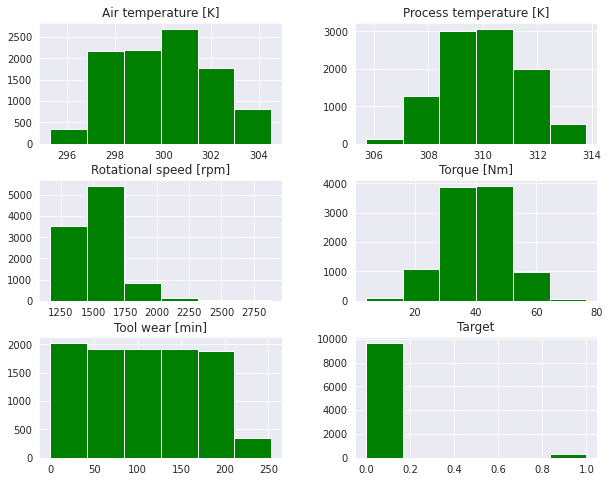

<Figure size 720x576 with 0 Axes>

In [63]:
plt.figure(figsize=(10,8))
df[['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 
    'Target']].hist(figsize=(10,8), bins= 6, color = 'green')
plt.figure(figsize=(10,8))
plt.tight_layout()
plt.show()

<h4><b>Findings</b></h4>

- Machine Air-Temperature[K] is in range 297 to 301.
- Machine Process-Temperature is in range 307 to 313.
- Machine Rotational Speed is in range 1250 to 1750.
- Machine Torque is in range 30 to 70.
- Machine Tool Wear is in range 0 to 200.
- Machine Target is in range 0.0 to 0.2.

In [64]:
df.select_dtypes(include='object').columns

Index(['Product ID', 'Type', 'Failure Type'], dtype='object')

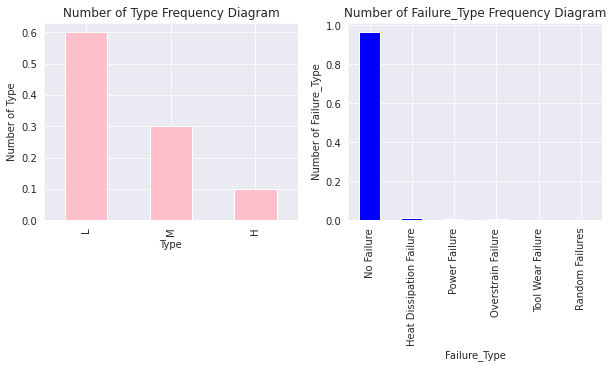

In [65]:
plt.figure(1)
plt.subplot(221)
df['Type'].value_counts(normalize = True).plot(figsize=(10, 8),
kind = 'bar', color = 'pink')
plt.title("Number of Type Frequency Diagram")
plt.xlabel("Type")
plt.ylabel("Number of Type")


plt.subplot(222)
df['Failure Type'].value_counts(normalize=True).plot(figsize=(10,8),
kind = 'bar', color = 'blue')
plt.title("Number of Failure_Type Frequency Diagram")
plt.xlabel("Failure_Type")
plt.ylabel("Number of Failure_Type")
plt.show()

<h4><b>Findings</b></h4>

- More than 70% of the Machine are Low type. 
- More than 80% of the Machine are No Failure.

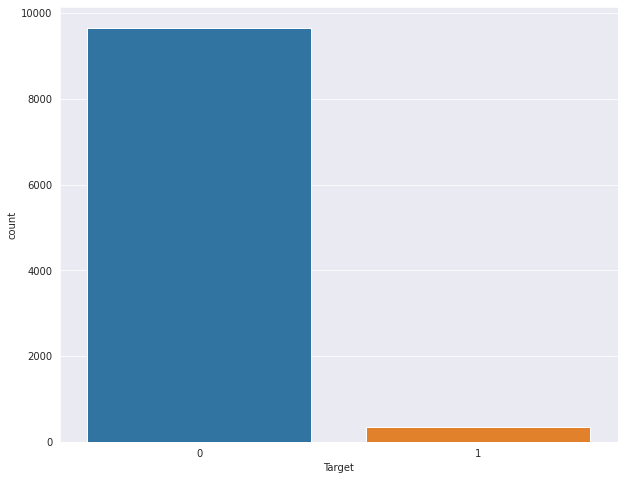

In [66]:
# Observe distribution of "Target : Failure or not" in a graph
plt.figure(figsize=(10,8))
sns.countplot(x='Target', data=df)
plt.show()

<h4><b>Findings</b></h4>

- The count of No Failure the Machine is high as compair to Failure of the Machine.

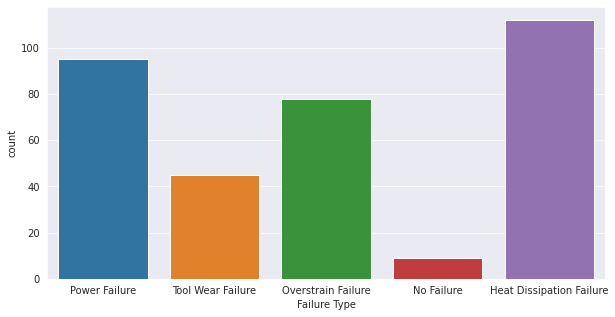

In [67]:
# Observe Distrbutions of "Target Failure Type : Type of Failure" in a bar graph.
plt.figure(figsize=(10, 5))
sns.countplot(x='Failure Type', data = df[df['Target']==1])

<h4><b>Findings</b></h4>

- Heat Dissipation Failure of the Machine count is more than as compair to other types of Machine Failure. 

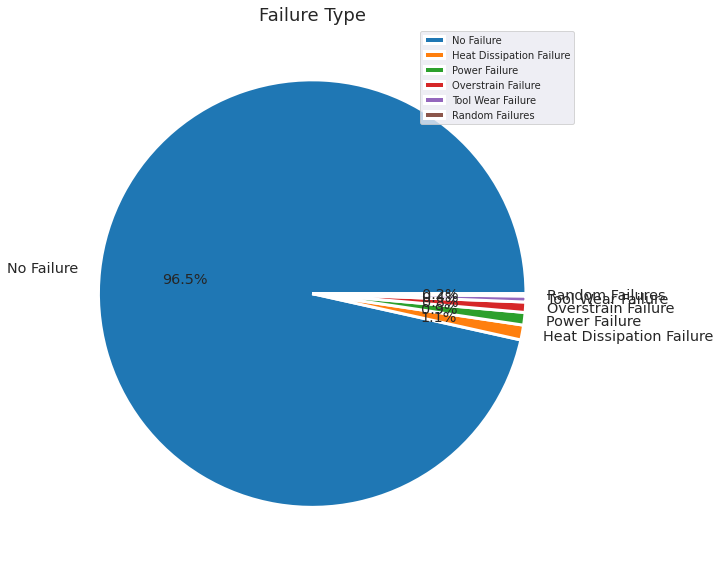

In [68]:
fig, ax = plt.subplots(figsize=(10,8))

counts = df['Failure Type'].value_counts()

ax.pie(counts.values, labels=counts.index, autopct='%.1f%%',
       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'})
ax.set_title('Failure Type', fontsize=18)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

<h4 align='justify'><b>Air Temperature Relation with Failure Type</b></h4>

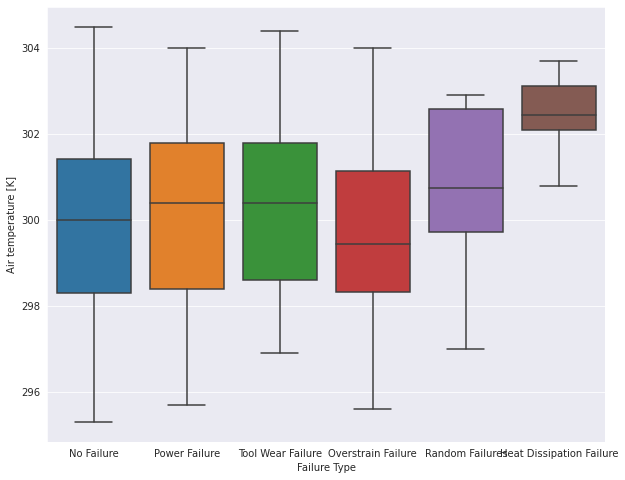

In [69]:
plt.figure(figsize=(10,8))
sns.boxplot(x = 'Failure Type', y = 'Air temperature [K]',data = df)
plt.show()

<h4 align='justify'><b>Process Temperature [K] Relation with Failure Type</b></h4>

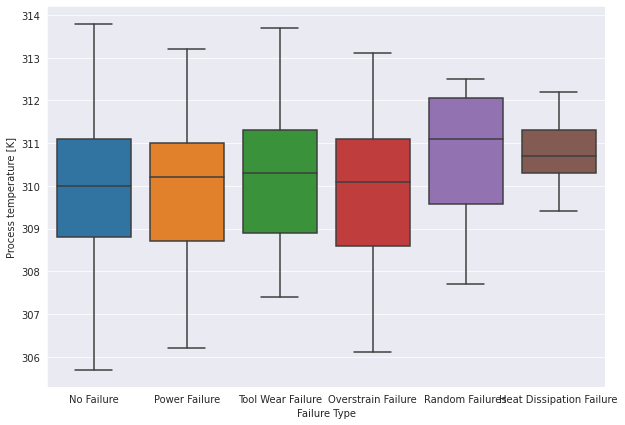

In [70]:
plt.figure(figsize=(10,7))
sns.boxplot(x = 'Failure Type', y = 'Process temperature [K]', data = df)
plt.show()

<h4 align='justify'><b>Rotational speed [rpm] Relation with Failure Type</b></h4>

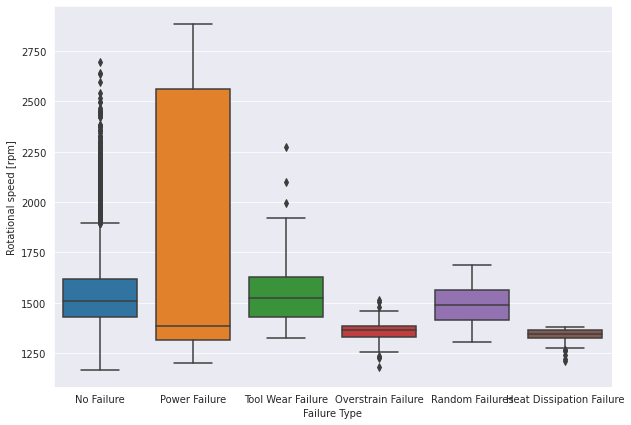

In [71]:
plt.figure(figsize=(10,7))
sns.boxplot(x = 'Failure Type', y = 'Rotational speed [rpm]', data = df)
plt.show()

<h4 align='justify'><b>Torque [Nm] Relation with Failure Type</b></h4>

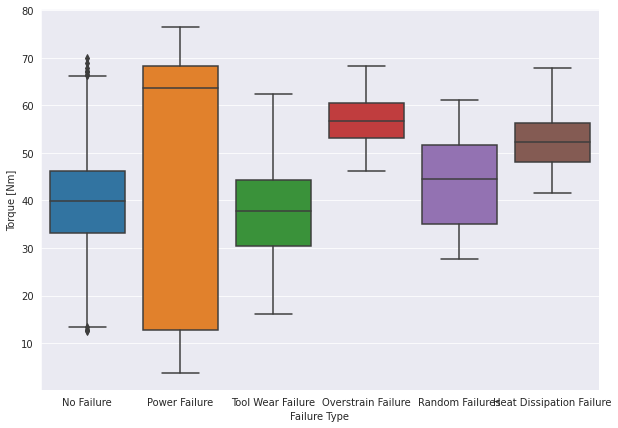

In [72]:
plt.figure(figsize=(10,7))
sns.boxplot(x = 'Failure Type', y = 'Torque [Nm]', data = df)
plt.show()

<h4 align='justify'><b>Tool wear [min] Relation with Failure Type</b></h4>

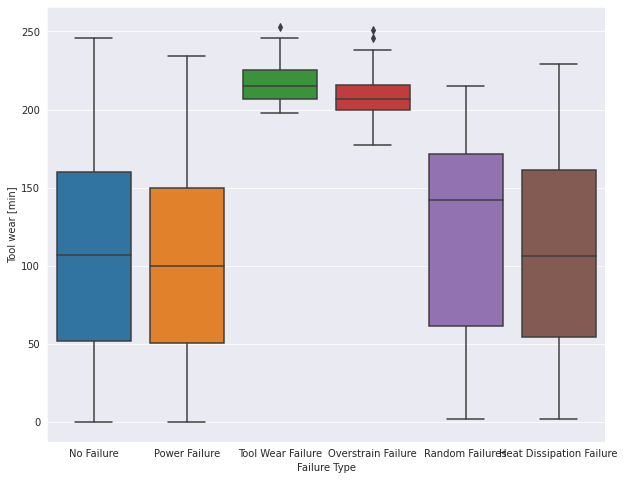

In [73]:
plt.figure(figsize=(10,8))
sns.boxplot(x = 'Failure Type', y = 'Tool wear [min]', data = df )
plt.show()

<h4><b>Data Preprocessing For Prediction</b></h4>

In [74]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(df['Type'])
df['Type'] = label_encoder.transform(df['Type'])

In [75]:
label_encoder.fit(df['Target'])
df['Target'] = label_encoder.transform(df['Target'])

In [76]:
df.Target.value_counts()

0    9661
1     339
Name: Target, dtype: int64

In [79]:
df['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [80]:
label_encoder.fit(df['Failure Type'])
df['Failure Type'] = label_encoder.transform(df['Failure Type'])

<h4><b>Data Preprocessing --Drop Unwanted</b></h4>

In [81]:
df = df.drop(['UDI', 'Product ID'], axis = 1)
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,2,298.1,308.6,1551,42.8,0,0,1
1,1,298.2,308.7,1408,46.3,3,0,1
2,1,298.1,308.5,1498,49.4,5,0,1
3,1,298.2,308.6,1433,39.5,7,0,1
4,1,298.2,308.7,1408,40.0,9,0,1


In [82]:
df.groupby(['Target','Failure Type']).count().drop(['Process temperature [K]',
                                                      'Rotational speed [rpm]',
                                                     'Torque [Nm]',
                                                     'Tool wear [min]',
                                                      'Air temperature [K]'],axis=1)

Type
Target Failure Type      
0      1             9643
       4               18
1      0              112
       1                9
       2               78
       3               95
       5               45

In [83]:
df.corr()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
Type,1.000000,0.017599,0.013444,-0.002693,0.004011,-0.003930,-0.005152,-0.008249
Air temperature [K],0.017599,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556,-0.025327
Process temperature [K],0.013444,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946,-0.004600
Rotational speed [rpm],-0.002693,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188,0.079407
Torque [Nm],0.004011,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321,0.031737
Tool wear [min],-0.003930,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448,0.111619
Target,-0.005152,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000,0.470541
Failure Type,-0.008249,-0.025327,-0.004600,0.079407,0.031737,0.111619,0.470541,1.000000


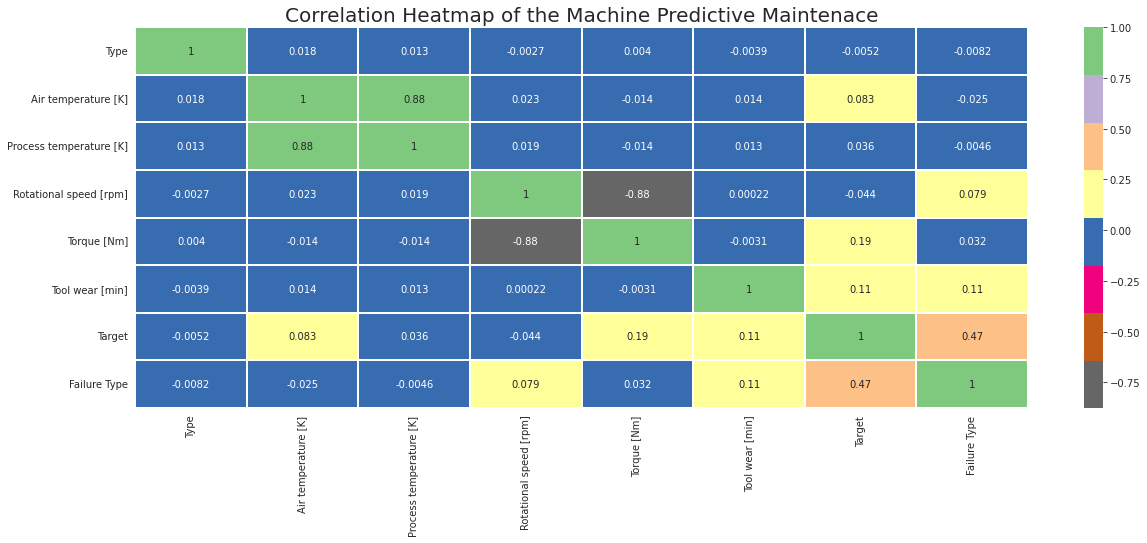

In [84]:
plt.figure(figsize=(20,7))
title = "Correlation Heatmap of the Machine Predictive Maintenace"
plt.title(title, fontsize = 20)
sns.heatmap(df.corr(), cbar = True, annot = True, linewidths= 1, cmap='Accent_r')
plt.show()

In [85]:
df[['Type', 'Target']].corr()

,Type,Target
Type,1.000000,-0.005152
Target,-0.005152,1.000000


(0.0, 1.05)

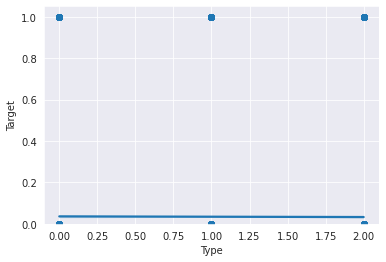

In [86]:
sns.regplot(x='Type', y ='Target', data = df)
plt.ylim(0,)

In [87]:
df[['Air temperature [K]', 'Target']].corr()

,Air temperature [K],Target
Air temperature [K],1.000000,0.082556
Target,0.082556,1.000000


(0.0, 1.0505163088520733)

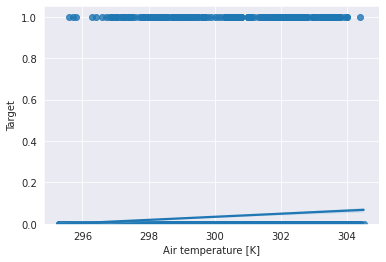

In [88]:
sns.regplot(x='Air temperature [K]', y ='Target',data = df)
plt.ylim(0,)

In [89]:
df[['Process temperature [K]', 'Target']].corr()

,Process temperature [K],Target
Process temperature [K],1.000000,0.035946
Target,0.035946,1.000000


(0.0, 1.05)

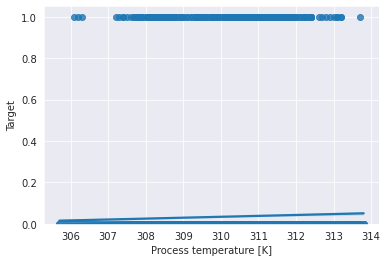

In [90]:
sns.regplot(x='Process temperature [K]', y='Target', data =df)
plt.ylim(0,)

In [91]:
df[[ 'Rotational speed [rpm]', 'Target']].corr()

,Rotational speed [rpm],Target
Rotational speed [rpm],1.000000,-0.044188
Target,-0.044188,1.000000


(0.0, 1.0541906207978529)

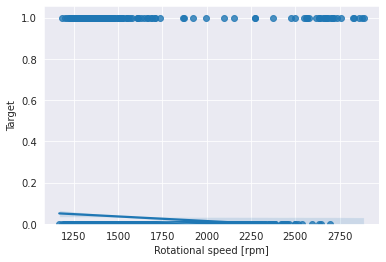

In [92]:
sns.regplot(x= 'Rotational speed [rpm]', y='Target', data = df)
plt.ylim(0,)

In [93]:
df[['Torque [Nm]', 'Target']].corr()

,Torque [Nm],Target
Torque [Nm],1.000000,0.191321
Target,0.191321,1.000000


(0.0, 1.0557484697018453)

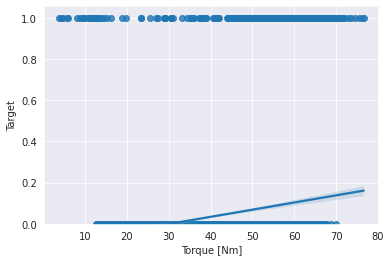

In [94]:
sns.regplot(x='Torque [Nm]', y ='Target', data = df)
plt.ylim(0,)

In [95]:
df[['Tool wear [min]', 'Target']].corr()

,Tool wear [min],Target
Tool wear [min],1.000000,0.105448
Target,0.105448,1.000000


(0.0, 1.0502506833560215)

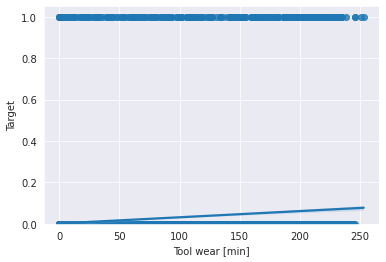

In [96]:
sns.regplot(x='Tool wear [min]', y = 'Target', data = df)
plt.ylim(0,)

<h4><b>Splitting the Data in Training & Testing</b></h4>

In [97]:
from sklearn.model_selection import train_test_split

X = df.drop(['Target', 'Failure Type'], axis = 1)
y = df[['Target', 'Failure Type']]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24 )

<h4><b>Feature Scaling</b></h4>

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.fit_transform(X_test)

<h4><b>Model Development Support Vector Mechanisms</b></h4>

In [100]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier

In [101]:
svc = SVC()
svc_clf = MultiOutputClassifier(estimator = svc)

svc_clf.fit(X_train, y_train)

print(f"Multi-Output Training Accuracy: {svc_clf.score(X_train, y_train)*100} %")

Multi-Output Training Accuracy: 96.525 %


In [106]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
y_pred_svc = svc_clf.predict(X_test)